# Document-Term Matrices

So far we've been making our own pandas dataframes of custom data. This is great, but there's also a very specific type of dataframe that helps us do a lot of different things. This is called a document-term matrix.

## What is a document-term matrix?

A document-term matrix (DTM) is simply a dataframe with terms (words) as columns, documents (texts) as rows, and the cells are the counts of those terms in those documents. For instance, if we had three documents:

* D1 = "I like this class"
* D2 = "I love this class"
* D3 = "I tolerate this class"

Then the document-term matrix would be:

| # |I|like|love|tolerate|this|class|
|--|-|----|----|--------|----|-----|
|D1|1|1   |0   |0       |1   |1    |
|D2|1|0   |1   |0       |1   |1    |
|D3|1|0   |0   |1       |1   |1    |

Why are these useful? With this type of dataframe, we can more easily:

* find the words which distinguish one group of texts from another group of texts.
* find which words often appear together in documents.
* calculate the "distance" between texts in terms of their word usage.
* cluster texts based on their word usage.
* ...and more!

## Review

In [1]:
# import some things
import os
import pandas as pd
from textblob import TextBlob
pd.set_option("display.max_rows", 20)

In [3]:
# just for an exercise below
letters = ['a','b','c','d','e']

### Reviewing how to make a dataframe (from lists of dictionaries)

We've been using a routine to make dataframes which we should maybe spell out.

In [7]:
# 1) Make a new list (for all result dictionaries)
results_dict = []
# (2) Loop over something
for letter in letters:
    # (3) For each thing in the loop, make a dictionary
    results_dict = {}
    # (4) Add some things to the dictionary
    results_dict['letter'] = letter
    results_dict['the bird'] = 'the word'
    # (5) add the individual result dictionary to the list of result dictionaries
    results.append(results_dict)
# (6) make a dataframe from the list of dictionaries
pd.DataFrame(results)

,letter,the bird
0,a,the word
1,b,the word
2,c,the word
3,d,the word
4,e,the word


#### @TODO: Make a dataframe that looks like this:

| name | status |
|------|--------|
|Rosencrantz|dead|
|Guildenstern|dead|

In [14]:
# To do so, loop over this list
names = ['Rosencrantz', 'Guildenstern']

# 1) Make a new list (for all result dictionaries)
all_results = []
# (2) Loop over something
for name in names: 
    # (3) For each thing in the loop, make a dictionary
    namedict = {}
    # (4) Add some things to the dictionary
    namedict["name"] = name
    namedict["status"] = "dead"
    # (5) add the individual result dictionary to the list of result dictionaries
    all_results.append(namedict)
# (6) make a dataframe from the list of dictionaries
pd.DataFrame(all_results)

,name,status
0,Rosencrantz,dead
1,Guildenstern,dead


### Reviewing how to loop over files

#### Method 1: Loop over metadata column

In [15]:
# For example:
df_meta = pd.read_excel('../corpora/harry_potter/metadata.xls')
df_meta

,fn,series_num,title,year
0,Sorcerers Stone.txt,1,Sorcerer's Stone,1997
1,Chamber of Secrets.txt,2,Chamber of Secrets,1998
2,Prisoner of Azkaban.txt,3,Prisoner of Azkaban,1999
3,Goblet of Fire.txt,4,Goblet of Fire,2000
4,Order of the Phoenix.txt,5,Order of the Phoenix,2003
5,Half-Blood Prince.txt,6,Half-Blood Prince,2005
6,Deathly Hallows.txt,7,Deathly Hallows,2007


In [16]:
# This is the filename column:
df_meta.fn
#
# (or)
#
df_meta['fn']

0         Sorcerers Stone.txt
1      Chamber of Secrets.txt
2     Prisoner of Azkaban.txt
3          Goblet of Fire.txt
4    Order of the Phoenix.txt
5       Half-Blood Prince.txt
6         Deathly Hallows.txt
Name: fn, dtype: object

In [20]:
# @TODO: Finish this:

# 1) Set a folder for this corpus
text_folder = '../corpora/harry_potter/texts/'

# 2) Loop over the filename column

for fn in df_meta.fn:
    # 3) Get and print the full path
    fullpath = os.path.join(text_folder, fn)
    print(fullpath)
    

../corpora/harry_potter/texts/Sorcerers Stone.txt
../corpora/harry_potter/texts/Chamber of Secrets.txt
../corpora/harry_potter/texts/Prisoner of Azkaban.txt
../corpora/harry_potter/texts/Goblet of Fire.txt
../corpora/harry_potter/texts/Order of the Phoenix.txt
../corpora/harry_potter/texts/Half-Blood Prince.txt
../corpora/harry_potter/texts/Deathly Hallows.txt


#### Method 2: Loop over the text files

We can also loop over files in a text folder directly.

In [21]:
# Get the filenames in a folder
filenames = os.listdir(text_folder)
filenames

['Sorcerers Stone.txt',
 'Goblet of Fire.txt',
 'Deathly Hallows.txt',
 'Prisoner of Azkaban.txt',
 'Chamber of Secrets.txt',
 'Half-Blood Prince.txt',
 'Order of the Phoenix.txt']

In [26]:
## @TODO: Finish this:

# 1) Set a folder for this corpus
text_folder = '../corpora/harry_potter/texts/'

# 2) Loop over the filename list
for fn in filenames:
    # 3) Get and print the full path
    print(os.path.join(text_folder, fn))
    

../corpora/harry_potter/texts/Sorcerers Stone.txt
../corpora/harry_potter/texts/Goblet of Fire.txt
../corpora/harry_potter/texts/Deathly Hallows.txt
../corpora/harry_potter/texts/Prisoner of Azkaban.txt
../corpora/harry_potter/texts/Chamber of Secrets.txt
../corpora/harry_potter/texts/Half-Blood Prince.txt
../corpora/harry_potter/texts/Order of the Phoenix.txt


**Note**: Sometimes we have to check if the file is a text file:

In [ ]:
# Check if filename endswith .txt
example_filename = 'The Bible.txt'
example_filename.endswith('.txt')

In [ ]:
# Check if filename ends with .txt?
example_filename = 'The Bible.jesus'
example_filename.endswith('.txt')

## Quick detour: Stopwords!

What's a stopword? A word we don't want to count! Function words, pronouns, common verbs and adverbs. Stop word lists are highly variable. NLTK gives us one. We need to download it first:

In [4]:
# Download stopwords list
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/diid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# NLTK's stopwords
from nltk.corpus import stopwords
stopword_list=stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
# Sets let us check whether a word is in the stopword list faster
stopword_set = set(stopword_list)

# is 'us' in the stopwords?
'us' in stopword_set

False

In [7]:
# is 'you' in the stopwords?
'you' in stopword_set

True

## How to make a document-term matrix

For this notebook, we'll be working with the 118 State of the Union speeches given by U.S. Presidents from 1900 to 2018. You can [download this corpus here](https://www.dropbox.com/sh/xd854hgyvbysqlm/AAAhbS6r7MFe4SVg1BFuuMTCa?dl=1). Please unzip it to your "corpora" folder.

In [2]:
# Set text folder and metadata path
# (If you don't have this corpus, please download it here): https://www.dropbox.com/sh/xd854hgyvbysqlm/AAAhbS6r7MFe4SVg1BFuuMTCa?dl=1

text_folder = '../corpora/peregrine/'
path_to_metadata='../corpora/peregrine/peregrine.csv'

### Major step 1: Make a list of dictionaries (of counts per text)

In [8]:
# 0) make a counter for a corpus-wide word count
from collections import Counter
all_counts = Counter()

# 1) make an empty results list
all_results = []

# 2) Loop over the filenames
filenames=sorted(os.listdir(text_folder))
for i,fn in enumerate(filenames):
    
    # make sure filename is a text file
    if not fn.endswith('.txt'): continue
    
    # just for a progress report:
    if not i%10:   #if i not divisible by 10
        # print some progress
        print('>> looping through #',i,'of',len(filenames),'files:',fn)
    
    # 3) get full path
    full_path = os.path.join(text_folder,fn)

    # 4) open the file
    with open(full_path) as file:
        txt=file.read()

    # 5) make a blob
    blob = TextBlob(txt.lower())

    # 6) make a result dictionary
    text_result = {}

    # 7) set the filename
    text_result['fn']=fn

    # 8) get the number of words
    num_words = len(blob.words)

    # 9) for each word,count pair in the blob.word_counts dictionary...
    for word,count in blob.word_counts.items():
        
        # is the word in the stopwords? if so, keep going
        if word in stopword_set: continue  

        # is the word a punctuation? if so, keep going
        if not word[0].isalpha(): continue

        
        # 10) set the normalized count for this word to the text_result dictionary
        text_result[word] = count / num_words
            
        # 11) add the count to the dictionary of counts for all words
        all_counts[word]+=count

    # 12) add result dictionary to all_results
    all_results.append(text_result)

>> looping through # 0 of 89 files: apr-2.txt
>> looping through # 10 of 89 files: dec-20.txt
>> looping through # 20 of 89 files: feb-10.txt
>> looping through # 30 of 89 files: mar-11.txt
>> looping through # 40 of 89 files: mar-22.txt
>> looping through # 50 of 89 files: mar-7.txt
>> looping through # 60 of 89 files: nov-21.txt
>> looping through # 70 of 89 files: oct-12.txt
>> looping through # 80 of 89 files: oct-29.txt


In [9]:
# So here's what the first dictionary looks like in our list of dictionaries
all_results[0]

{'accelerating': 0.0022624434389140274,
 'across': 0.00904977375565611,
 'actually': 0.0022624434389140274,
 'air': 0.0022624434389140274,
 'alert': 0.0022624434389140274,
 'almost': 0.0022624434389140274,
 'already': 0.0022624434389140274,
 'approach': 0.0022624434389140274,
 'avid': 0.0022624434389140274,
 'away': 0.004524886877828055,
 'back': 0.011312217194570135,
 'bats': 0.0022624434389140274,
 'beat': 0.0022624434389140274,
 'behind': 0.0022624434389140274,
 'beings': 0.0022624434389140274,
 'beside': 0.0022624434389140274,
 'big': 0.0022624434389140274,
 'bird': 0.0022624434389140274,
 'bird-song': 0.0022624434389140274,
 'birds': 0.004524886877828055,
 'blackbirds': 0.0022624434389140274,
 'blue': 0.0022624434389140274,
 'blueness': 0.0022624434389140274,
 'bones': 0.0022624434389140274,
 'breast-bone': 0.0022624434389140274,
 'broad': 0.004524886877828055,
 'brown': 0.0022624434389140274,
 'bulky': 0.0022624434389140274,
 'buntings': 0.0022624434389140274,
 'bushes': 0.002262

### Major step #2: Convert list of dictionaries to a dataframe

There are many many kinds of words in these texts. Here's the number of unique words in all our all_counts dictionary:

In [10]:
len(all_counts)

5623

That's too many columns for our document-term matrix! So let's get the most common words:

In [12]:
# because all_counts is a Counter (see above), we can find the most common 10 words
all_counts.most_common(30)

[('like', 768),
 ('flew', 520),
 ('wings', 484),
 ('hawk', 484),
 ('peregrine', 396),
 ('sky', 384),
 ('wind', 336),
 ('away', 306),
 ('back', 294),
 ('long', 292),
 ('sun', 286),
 ('white', 264),
 ('across', 246),
 ('air', 236),
 ('fields', 232),
 ('water', 232),
 ('two', 216),
 ('slowly', 214),
 ('river', 212),
 ('dark', 210),
 ('one', 210),
 ('head', 210),
 ('rose', 210),
 ('high', 206),
 ('light', 198),
 ('birds', 196),
 ('still', 194),
 ('feet', 184),
 ('went', 182),
 ('trees', 172)]

So let's convert the results to a dataframe *while also limiting the number of columns*.

In [14]:
###
# Convert all_results to dataframe while limiting number of columns
#

# set number of words we want
n_top_words = 100

# 13) Get the most frequent words
most_common_words_plus_counts = all_counts.most_common(n_top_words)

# 14) Get only the words
words_we_want = []
for word,count in most_common_words_plus_counts:
    words_we_want.append(word)

# 15) set a list for the columns, which is the words we want plus the 'fn' column
columns = words_we_want
columns.append('fn')

# 16) Make dataframe
dtm = pd.DataFrame(all_results, columns=columns)

# 17) Set the filename as the index and fill empty values with 0
dtm=dtm.set_index('fn').fillna(0)

# show!
dtm

,like,flew,wings,hawk,peregrine,sky,wind,away,back,long,...,sunlight,hour,day,woodpigeons,deep,rain,fast,minutes,together,shining
fn,,,,,,,,,,,,,,,,,,,,,
apr-2.txt,0.006787,0.000000,0.004525,0.000000,0.004525,0.000000,0.000000,0.004525,0.011312,0.004525,...,0.002262,0.000000,0.000000,0.002262,0.004525,0.000000,0.004525,0.002262,0.000000,0.000000
apr-3.txt,0.007435,0.007435,0.002478,0.001239,0.006196,0.002478,0.001239,0.006196,0.004957,0.003717,...,0.001239,0.002478,0.000000,0.000000,0.001239,0.000000,0.000000,0.001239,0.001239,0.000000
apr-4.txt,0.002257,0.003386,0.003386,0.006772,0.004515,0.005643,0.005643,0.004515,0.000000,0.002257,...,0.000000,0.000000,0.002257,0.000000,0.001129,0.000000,0.000000,0.000000,0.000000,0.001129
dec-1.txt,0.006402,0.008963,0.006402,0.002561,0.006402,0.006402,0.002561,0.005122,0.003841,0.002561,...,0.003841,0.001280,0.000000,0.002561,0.000000,0.000000,0.001280,0.001280,0.000000,0.002561
dec-10.txt,0.016245,0.007220,0.000000,0.005415,0.005415,0.003610,0.003610,0.000000,0.000000,0.001805,...,0.000000,0.000000,0.000000,0.001805,0.000000,0.000000,0.001805,0.001805,0.003610,0.000000
dec-12.txt,0.006011,0.009016,0.007513,0.007513,0.004508,0.001503,0.003757,0.002254,0.004508,0.001503,...,0.000000,0.003005,0.000751,0.000000,0.000751,0.000751,0.001503,0.001503,0.000751,0.000000
dec-15.txt,0.009751,0.006501,0.008667,0.007584,0.005417,0.005417,0.008667,0.002167,0.002167,0.002167,...,0.000000,0.000000,0.000000,0.004334,0.000000,0.003250,0.002167,0.000000,0.002167,0.001083
dec-17.txt,0.006258,0.005006,0.007509,0.005006,0.001252,0.006258,0.008761,0.001252,0.001252,0.003755,...,0.000000,0.001252,0.000000,0.000000,0.001252,0.000000,0.002503,0.000000,0.000000,0.001252
dec-18.txt,0.013986,0.000000,0.010490,0.000000,0.003497,0.013986,0.003497,0.003497,0.000000,0.006993,...,0.000000,0.000000,0.000000,0.000000,0.003497,0.000000,0.000000,0.000000,0.003497,0.000000


In [16]:
# Can sort by particular words
dtm.sort_values('rain',ascending=False)

,like,flew,wings,hawk,peregrine,sky,wind,away,back,long,...,sunlight,hour,day,woodpigeons,deep,rain,fast,minutes,together,shining
fn,,,,,,,,,,,,,,,,,,,,,
mar-30.txt,0.004274,0.004274,0.000000,0.012821,0.008547,0.000000,0.008547,0.000000,0.000000,0.000000,...,0.004274,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000
mar-7.txt,0.012346,0.000000,0.000000,0.012346,0.000000,0.000000,0.012346,0.012346,0.000000,0.000000,...,0.000000,0.000000,0.024691,0.000000,0.000000,0.024691,0.000000,0.000000,0.000000,0.012346
mar-9.txt,0.005102,0.005102,0.005102,0.000000,0.005102,0.000000,0.005102,0.005102,0.005102,0.010204,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000
nov-26.txt,0.014354,0.007177,0.007177,0.002392,0.004785,0.007177,0.000000,0.002392,0.000000,0.007177,...,0.000000,0.002392,0.000000,0.000000,0.000000,0.009569,0.002392,0.000000,0.000000,0.000000
oct-18.txt,0.001267,0.010139,0.005070,0.008872,0.006337,0.000000,0.001267,0.001267,0.002535,0.001267,...,0.000000,0.001267,0.000000,0.001267,0.000000,0.008872,0.000000,0.006337,0.001267,0.001267
nov-6.txt,0.015471,0.002813,0.005626,0.007032,0.002813,0.007032,0.001406,0.004219,0.005626,0.000000,...,0.000000,0.001406,0.000000,0.001406,0.001406,0.005626,0.000000,0.001406,0.000000,0.001406
mar-13.txt,0.005263,0.005263,0.002632,0.005263,0.002632,0.002632,0.000000,0.002632,0.002632,0.002632,...,0.000000,0.002632,0.000000,0.000000,0.000000,0.005263,0.000000,0.000000,0.000000,0.000000
nov-24.txt,0.006637,0.011062,0.004425,0.004425,0.006637,0.002212,0.013274,0.002212,0.000000,0.000000,...,0.000000,0.002212,0.002212,0.002212,0.000000,0.004425,0.002212,0.000000,0.000000,0.000000
dec-3.txt,0.012000,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,0.004000,0.000000,0.000000,...,0.000000,0.000000,0.004000,0.000000,0.004000,0.004000,0.000000,0.000000,0.004000,0.000000


### Combining DTMs with metadata

In [18]:
# Get the metadata for this corpus
df_meta = pd.read_csv(path_to_metadata).set_index('fn')
df_meta

,season
fn,
feb-22.txt,winter
mar-5.txt,spring
dec-18.txt,winter
oct-26.txt,fall
dec-24.txt,winter
nov-11.txt,fall
nov-13.txt,fall
mar-6.txt,spring
oct-30.txt,fall


In [19]:
# merge
dtm_meta=df_meta.merge(dtm,on='fn')
dtm_meta

,season,like,flew,wings,hawk,peregrine,sky,wind,away,back,...,sunlight,hour,day,woodpigeons,deep,rain,fast,minutes,together,shining
fn,,,,,,,,,,,,,,,,,,,,,
feb-22.txt,winter,0.000000,0.005102,0.002551,0.005102,0.007653,0.002551,0.002551,0.002551,0.000000,...,0.000000,0.002551,0.000000,0.007653,0.007653,0.000000,0.000000,0.000000,0.005102,0.000000
mar-5.txt,spring,0.000000,0.005587,0.005587,0.002793,0.005587,0.002793,0.008380,0.000000,0.008380,...,0.000000,0.000000,0.005587,0.002793,0.000000,0.000000,0.000000,0.002793,0.000000,0.000000
dec-18.txt,winter,0.013986,0.000000,0.010490,0.000000,0.003497,0.013986,0.003497,0.003497,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003497,0.000000,0.000000,0.000000,0.003497,0.000000
oct-26.txt,fall,0.006775,0.009485,0.004065,0.005420,0.004065,0.002710,0.002710,0.001355,0.004065,...,0.001355,0.001355,0.000000,0.000000,0.000000,0.001355,0.000000,0.000000,0.000000,0.000000
dec-24.txt,winter,0.011454,0.000000,0.003524,0.004405,0.001762,0.003524,0.000881,0.005286,0.001762,...,0.002643,0.000000,0.000881,0.000881,0.001762,0.000000,0.000000,0.000881,0.000881,0.000000
nov-11.txt,fall,0.000000,0.011962,0.002392,0.009569,0.000000,0.004785,0.000000,0.004785,0.002392,...,0.002392,0.000000,0.000000,0.000000,0.002392,0.000000,0.002392,0.000000,0.002392,0.000000
nov-13.txt,fall,0.008130,0.003252,0.001626,0.001626,0.003252,0.001626,0.000000,0.006504,0.001626,...,0.001626,0.001626,0.001626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003252
mar-6.txt,spring,0.005540,0.005540,0.000000,0.013850,0.002770,0.002770,0.002770,0.005540,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002770
oct-30.txt,fall,0.005181,0.002591,0.002591,0.000000,0.002591,0.005181,0.007772,0.000000,0.005181,...,0.002591,0.000000,0.002591,0.000000,0.000000,0.002591,0.000000,0.000000,0.000000,0.002591


#### Plotting meta+DTM

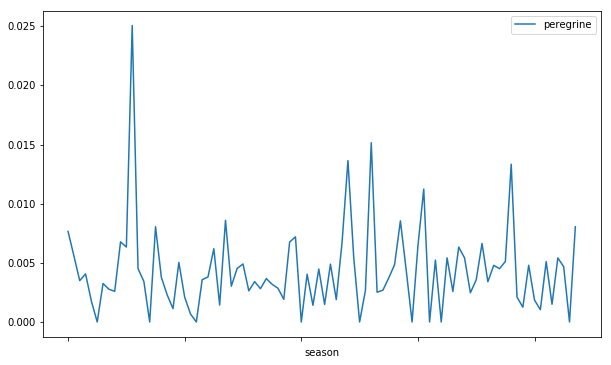

In [22]:
# Plot poverty over time
dtm_meta.plot(x='season',y='peregrine',figsize=(10,6))

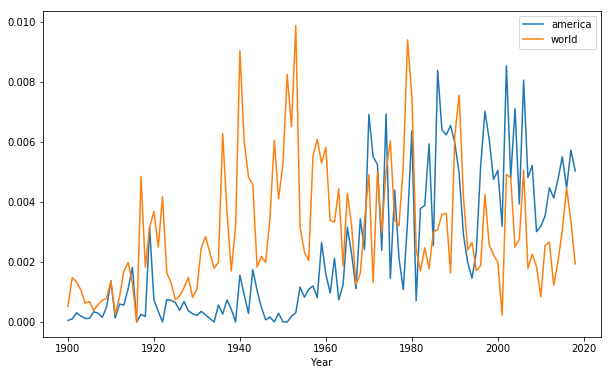

In [47]:
# Multi-line graphs
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

# The Long History of America First?
dtm_meta.plot(x='Year',y='america',ax=ax)
dtm_meta.plot(x='Year',y='world',ax=ax)

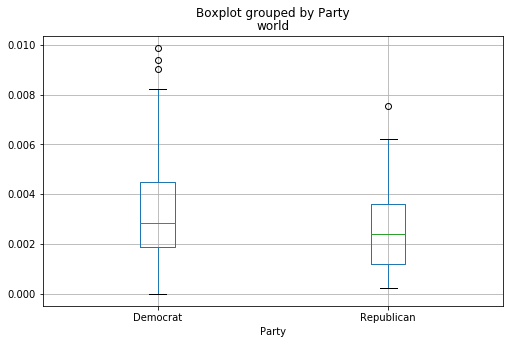

In [48]:
# Boxplots by party

dtm_meta.boxplot('world',by='Party',figsize=(8,5))

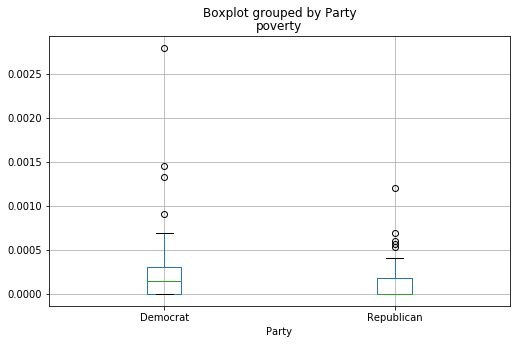

In [49]:
# Poverty?
dtm_meta.boxplot('poverty',by='Party',figsize=(8,5))

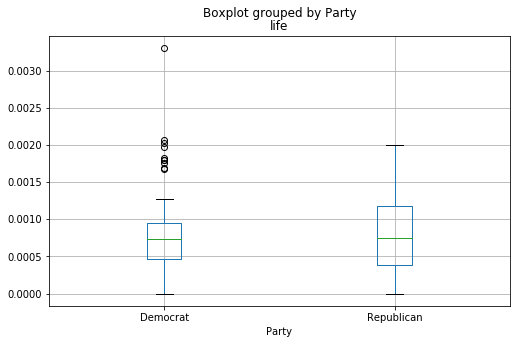

In [63]:
# Immigration?
dtm_meta.boxplot('life',by='Party',figsize=(8,5))

In [70]:
dtm_meta.sort_values('law',ascending=False)

,President,Year,Party,government,must,people,congress,world,new,year,...,september,authorized,postal,materials,understand,facts,fall,offer,partnership,afghanistan
fn,,,,,,,,,,,,,,,,,,,,,
1916.Wilson.txt,Wilson,1916,Democrat,0.000472,0.001416,0.000944,0.004719,0.000000,0.000472,0.000000,...,0.000000,0.000472,0.000000,0.000000,0.000000,0.000944,0.000000,0.000000,0.000000,0.000000
1907.Roosevelt.txt,Roosevelt,1907,Republican,0.003393,0.002408,0.001569,0.001824,0.000584,0.000584,0.000912,...,0.000182,0.000073,0.000146,0.000000,0.000036,0.000255,0.000073,0.000036,0.000000,0.000000
2004.Bush.txt,Bush,2004,Republican,0.000960,0.003457,0.004033,0.002305,0.002497,0.002881,0.001344,...,0.000768,0.000000,0.000000,0.000000,0.000384,0.000192,0.000192,0.000000,0.000000,0.000960
1923.Coolidge.txt,Coolidge,1923,Republican,0.007013,0.005521,0.002835,0.002089,0.001641,0.001044,0.000298,...,0.000000,0.000149,0.000000,0.000149,0.000000,0.000448,0.000000,0.000000,0.000000,0.000000
1905.Roosevelt.txt,Roosevelt,1905,Republican,0.003505,0.002270,0.002031,0.002111,0.000677,0.000438,0.000797,...,0.000040,0.000159,0.000000,0.000040,0.000080,0.000159,0.000040,0.000159,0.000000,0.000000
1906.Roosevelt.txt,Roosevelt,1906,Republican,0.003513,0.002116,0.002582,0.001143,0.000381,0.000720,0.000423,...,0.000000,0.000000,0.000000,0.000000,0.000042,0.000127,0.000169,0.000000,0.000000,0.000000
1911.Taft.txt,Taft,1911,Republican,0.003794,0.001054,0.000970,0.002614,0.000253,0.001518,0.001644,...,0.000084,0.000126,0.000801,0.000169,0.000042,0.000126,0.000000,0.000084,0.000000,0.000000
1902.Roosevelt.txt,Roosevelt,1902,Republican,0.001637,0.002661,0.002252,0.003582,0.001330,0.000819,0.000716,...,0.000000,0.000000,0.000205,0.000000,0.000000,0.000102,0.000409,0.000000,0.000000,0.000000
1921.Harding.txt,Harding,1921,Republican,0.003919,0.002494,0.002316,0.002672,0.002494,0.000356,0.000178,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000178,0.000000,0.000000
